<a href="https://colab.research.google.com/github/hanochk/Masters/blob/master/reid_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --index-url http://74.82.29.209:8090 nebula3_database==0.2.2 --trusted-host 74.82.29.209

Looking in indexes: http://74.82.29.209:8090, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 251 kB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 4.2 MB 8.5 MB/s 
     |████████████████████████████████| 52 kB 261 kB/s 
     |████████████████████████████████| 2.5 MB 36.2 MB/s 
     |████████████████████████████████| 42 kB 542 kB/s 
     |████████████████████████████████| 140 kB 47.8 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: grpcio
    Found existing installation: grpci

In [2]:
%pip install ipywidgets 
# To enable `ipywidgets`
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.8 MB/s 
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [3]:
from database.arangodb import DatabaseConnector 
from ipywidgets import widgets
from IPython.display import display
from IPython.display import Image


In [44]:
reid_data = []
table_data = []
gdb = DatabaseConnector()
db = gdb.connect_db('prodemo')
query = 'FOR doc IN s4_re_id RETURN doc'
cursor = db.aql.execute(query)

predefined = True
if predefined:
  desired_list = list()
  desired_list.append('Movies/-5544372812976954246')
  desired_list.append('Movies/2964695059543187677')
  desired_list.append('Movies/3466775260861419510')
  desired_list.append('Movies/9007825399624725127')
  desired_list.append('Movies/4463643025718359582')
  desired_list.append('Movies/443075016773775387')

for reid in cursor:
  if reid['movie_id'] in desired_list:
    reid_data.append(reid)
    table_data.append(reid['movie_id'])


In [45]:
dropdown_movies = widgets.Dropdown(options = table_data, description = "Movie")
display(dropdown_movies)

Dropdown(description='Movie', options=('Movies/9007825399624725127', 'Movies/4463643025718359582', 'Movies/443…

Reid Frames for movie:  Movies/3466775260861419510


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0626.jpg


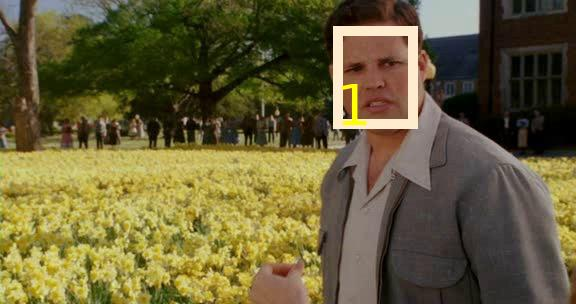


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0536.jpg


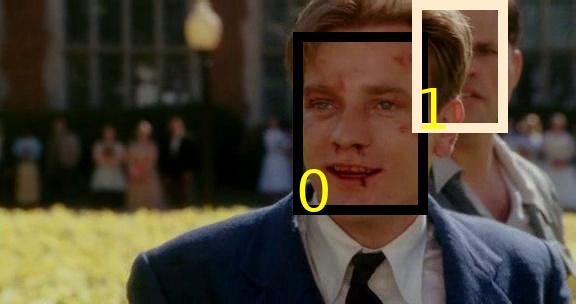


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0318.jpg


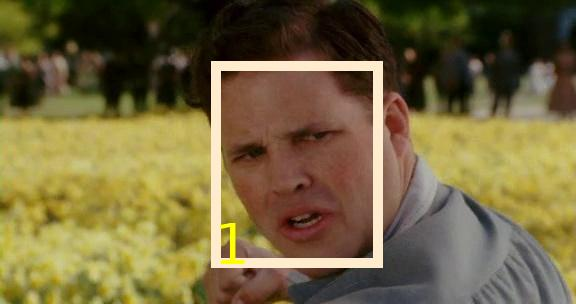


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0463.jpg


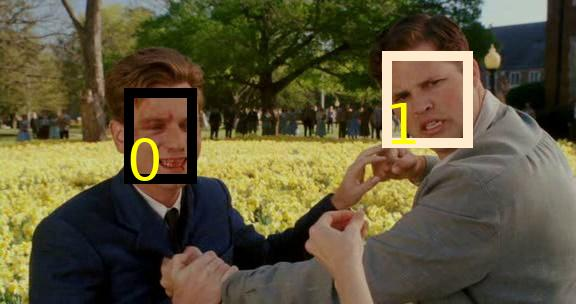


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0213.jpg


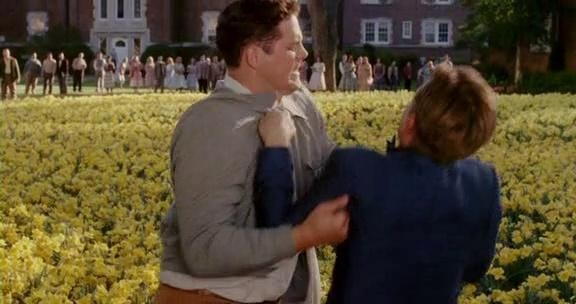


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0565.jpg


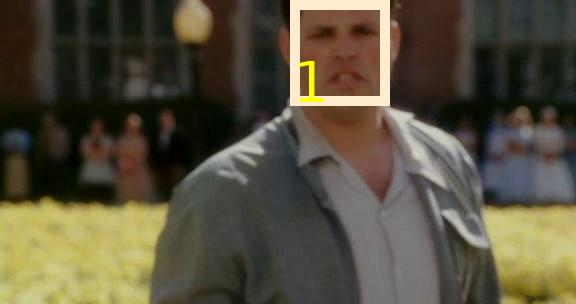


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0166.jpg


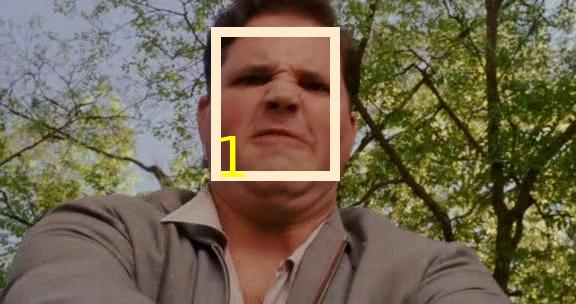


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0424.jpg


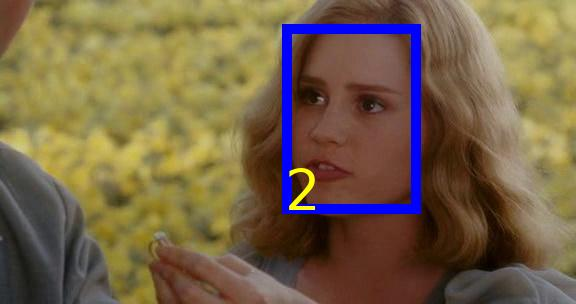


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0062.jpg


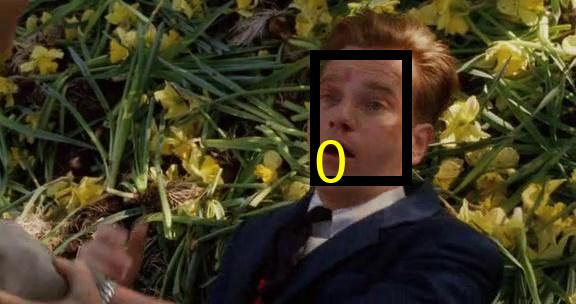


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0093.jpg


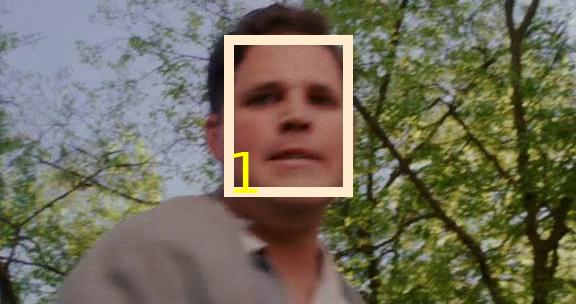


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00013/re_id/re-id_frame0285.jpg


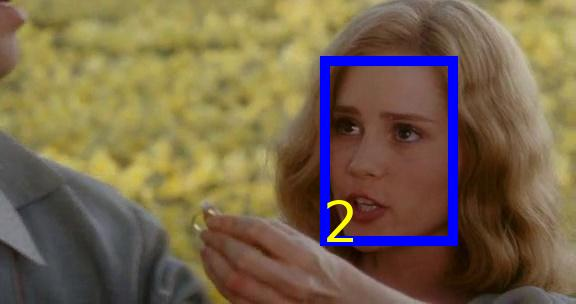

In [49]:
idx = dropdown_movies.index

selectd_reid = reid_data[idx]

print("===================================================")
print("Reid Frames for movie: ", selectd_reid['movie_id'])
print("===================================================")
print()
for reid_frames in selectd_reid['urls']:
  if len(reid_frames) > 0:
    #for frame in reid_frames:
    print()
    print(reid_frames['url'])
    img_to_show = Image(reid_frames['url'])
    if img_to_show.data is None:
      print("No images uploaded to WebServer")
    else:
      display(img_to_show)
      #print(reid_frames['frame_number'])
